In [ ]:
! unzip '/content/archive (1).zip'

Archive:  /content/archive (1).zip
replace UpdatedResumeDataSet.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
data['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
Blockchain                   40
ETL Developer                40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
data['resume_length'] = [len(x) for x in data['Resume']]

In [ ]:
data.head()

,Category,Resume,resume_length
0,Data Science,Skills * Programming Languages: Python (pandas...,4786
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,1268
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",1871
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6995
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",452


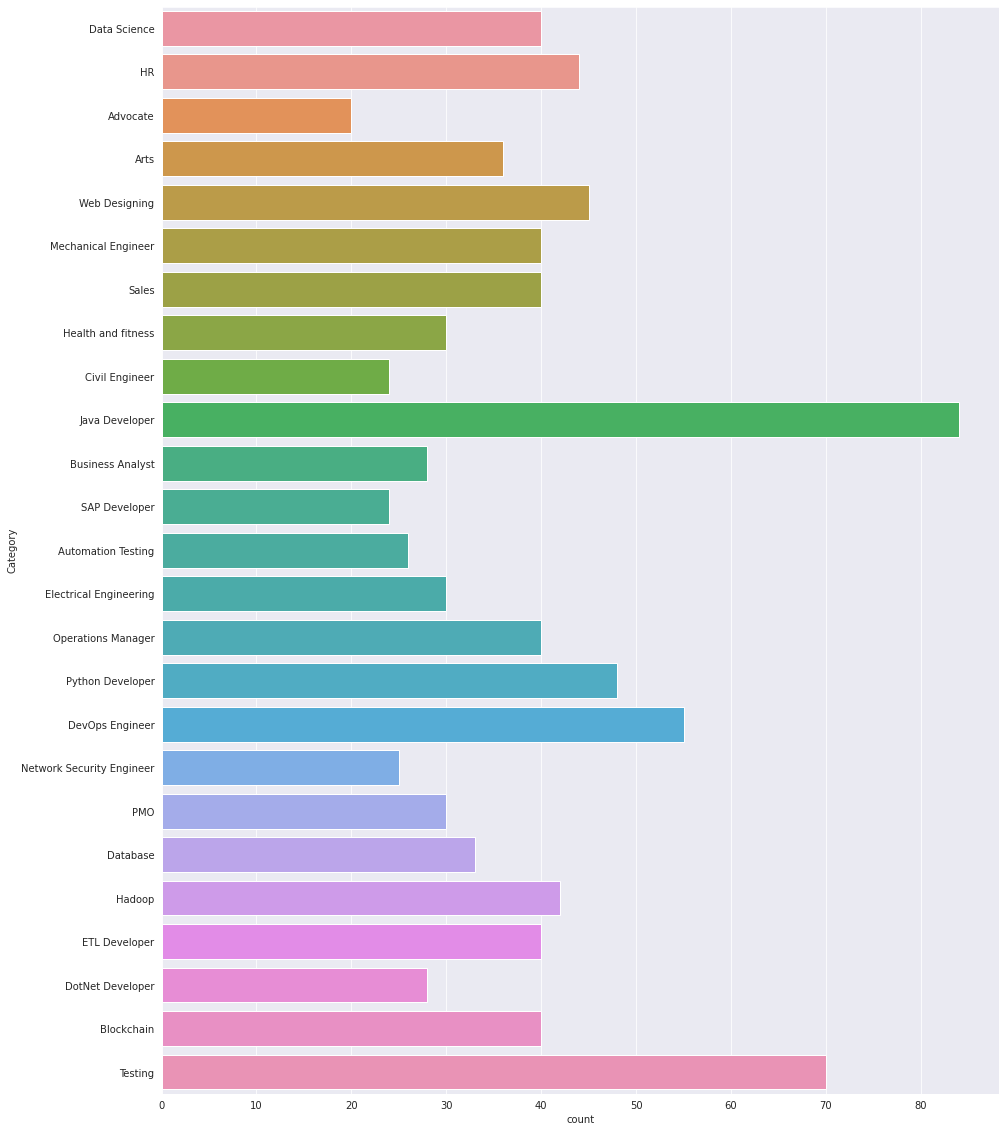

In [ ]:
plt.figure(figsize=(15,20))
sns.set_style('darkgrid')
sns.countplot(y=data['Category'])

In [ ]:
data['resume_length'].groupby(data['Category']).mean()

Category
Advocate                       953.700000
Arts                          2293.500000
Automation Testing            4163.769231
Blockchain                    2290.200000
Business Analyst              4944.428571
Civil Engineer                3069.166667
Data Science                  3213.100000
Database                      3873.909091
DevOps Engineer               3996.745455
DotNet Developer              2786.571429
ETL Developer                 3557.600000
Electrical Engineering        2545.000000
HR                             672.636364
Hadoop                        3551.428571
Health and fitness            1886.666667
Java Developer                1629.428571
Mechanical Engineer           3142.200000
Network Security Engineer     4168.600000
Operations Manager           12025.250000
PMO                           5414.333333
Python Developer              1791.000000
SAP Developer                 3769.000000
Sales                         1670.200000
Testing                  

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
data['Resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [ ]:
#cleaned resume text
data.head()

,Category,Resume,resume_length
0,Data Science,Skills Programming Languages Python pandas num...,4786
1,Data Science,Education Details May 2013 to May 2017 B E UIT...,1268
2,Data Science,Areas of Interest Deep Learning Control System...,1871
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6995
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...,452


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
StopWords = set(stopwords.words('english')+['``',"''"])
total_words = []
for i in data['Resume']:
  words = nltk.word_tokenize(i)
  for word in words:
    if word not in StopWords and word not in string.punctuation:
      total_words.append(word)

In [ ]:
wordfreqlist = nltk.FreqDist(total_words)

In [ ]:
wordfreqlist

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

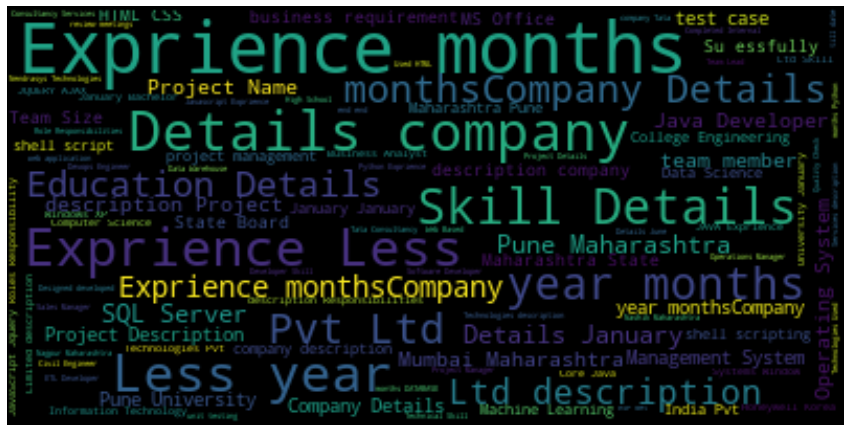

In [ ]:
cleanedresume=""
for i in data['Resume']:
  cleanedresume += i
wc = WordCloud().generate(cleanedresume)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = data['Category']
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

In [ ]:
data['Text_category'] = var_mod

In [ ]:
data.head()

,Category,Resume,resume_length,Text_category
0,6,Skills Programming Languages Python pandas num...,4786,Data Science
1,6,Education Details May 2013 to May 2017 B E UIT...,1268,Data Science
2,6,Areas of Interest Deep Learning Control System...,1871,Data Science
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6995,Data Science
4,6,Education Details MCA YMCAUST Faridabad Haryan...,452,Data Science


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
vectorizer.fit(data['Resume'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1500,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
target_cat = data['Category'].values

In [ ]:
word_vector = vectorizer.transform(data['Resume'].values)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(word_vector,target_cat,test_size=0.2,random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
model1  = RandomForestClassifier()

In [ ]:
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = model1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,pred)

1.0

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         9
          17       1.00    

In [ ]:
pip install pymupdf

In [ ]:
def predictor(resume):
  import fitz
  res = fitz.open(resume)
  text=""
  for page_num in range(res.page_count):
    obj = res[page_num]
    text += obj.getText('text')
  text = cleanResume(text)
  s = [text]
  wvec = vectorizer.transform(s)
  return model1.predict(wvec),wvec

In [ ]:
cat,vec = predictor('/content/candidate_009.pdf')

Deprecation: 'getText' removed from class 'Page' after v1.19.0 - use 'get_text'.


In [ ]:
def JD(description):
  import fitz
  res = fitz.open(description)
  text=""
  for page_num in range(res.page_count):
    obj = res[page_num]
    text += obj.getText('text')
  text = cleanResume(text)
  s = [text]
  wvec = vectorizer.transform(s)
  return wvec

In [ ]:
jdvec = JD('/content/Job description.pdf')

Deprecation: 'getText' removed from class 'Page' after v1.19.0 - use 'get_text'.


In [ ]:
label = data['Category'].unique()

In [ ]:
category=data['Text_category'].unique()

In [ ]:
prediction ={label[i]: category[i] for i in range(len(label))}

In [ ]:
def predictor(resume):
  import fitz
  res = fitz.open(resume)
  text=""
  for page_num in range(res.page_count):
    obj = res[page_num]
    text += obj.getText('text')
  text = cleanResume(text)
  s = [text]
  wvec = vectorizer.transform(s)
  cat = model1.predict(wvec)
  return prediction.get(cat[0])

In [ ]:
print(predictor('/content/candidate_009.pdf'))

Data Science


Deprecation: 'getText' removed from class 'Page' after v1.19.0 - use 'get_text'.


In [ ]:
! pip install streamlit
import pickle
import streamlit as st

In [ ]:
pickle_out = open('classifier.pkl',mode='wb')
pickle.dump(model1, pickle_out) 

In [ ]:
pickle_out.close()